<a href="https://colab.research.google.com/github/gtsagkatakis/OptimizationMethods_2024/blob/main/573_Lasso_PG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler

In [8]:
# Generate synthetic data
n_samples, n_features = 500, 100
n_informative = 20
noise = 0.1
X, y, coef_true = make_regression(
    n_samples=n_samples,
    n_features=n_features,
    n_informative=n_informative,
    noise=noise,
    coef=True,
    random_state=42
)

# Standardize the feature matrix
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Parameters
alpha = 0.001  # Learning rate
lmbda = 10  # Regularization strength
n_iterations = 10

In [10]:
# --- Subgradient Descent ---
w_subgrad = np.zeros(n_features)  # Initialize weights
objective_values_subgrad = []

for iteration in range(n_iterations):
    # Compute gradients
    grad_ls = -2 * X_scaled.T @ (y - X_scaled @ w_subgrad)  # Least squares gradient
    grad_l1 = np.sign(w_subgrad)  # Subgradient of the L1 term
    grad = grad_ls + lmbda * grad_l1  # Combined gradient

    # Update weights
    w_subgrad -= alpha * grad

    # Compute objective value
    obj_value = np.linalg.norm(y - X_scaled @ w_subgrad)**2 + lmbda * np.sum(np.abs(w_subgrad))
    objective_values_subgrad.append(obj_value)

In [11]:
# --- Proximal Gradient Descent ---
def soft_threshold(x, threshold):
    """Soft-thresholding operator."""
    return np.sign(x) * np.maximum(np.abs(x) - threshold, 0)

w_proxgrad = np.zeros(n_features)  # Initialize weights
objective_values_proxgrad = []

for iteration in range(n_iterations):
    # Compute gradient of the least squares term


    # Gradient step


    # Apply proximal operator (soft-thresholding)


    # Compute objective value
    obj_value = np.linalg.norm(y - X_scaled @ w_proxgrad)**2 + lmbda * np.sum(np.abs(w_proxgrad))
    objective_values_proxgrad.append(obj_value)

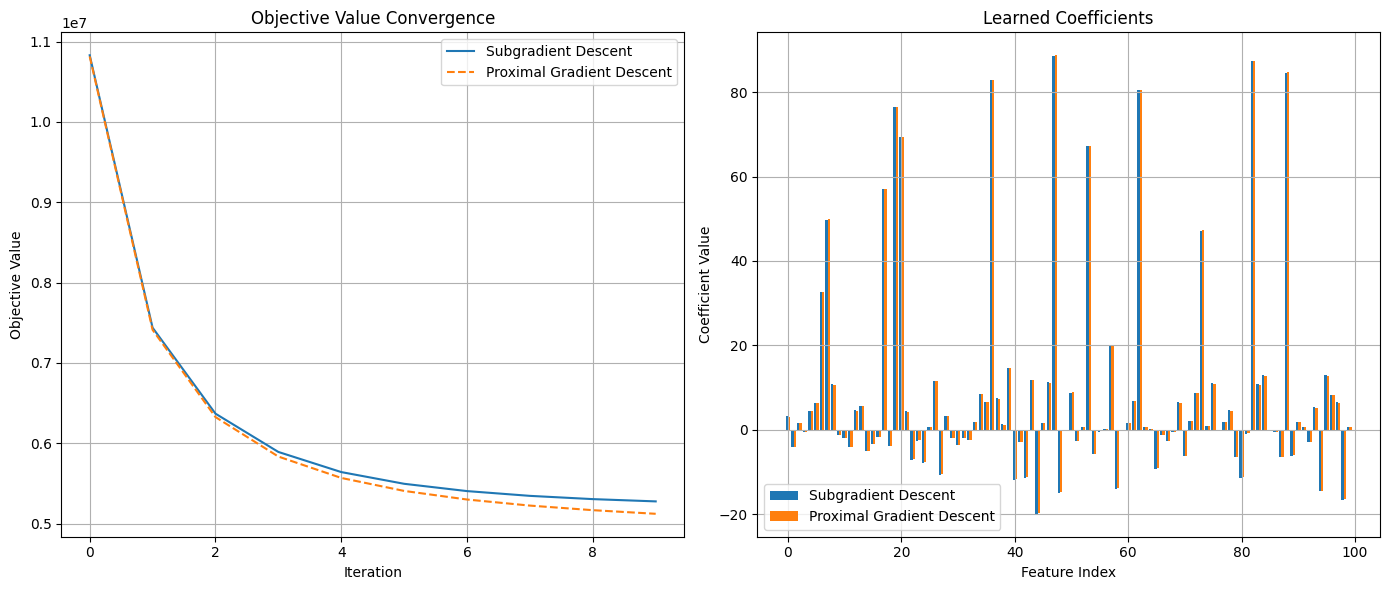

Subgradient Descent: 100 non-zero coefficients
Proximal Gradient Descent: 100 non-zero coefficients


In [12]:


# --- Visualization ---
plt.figure(figsize=(14, 6))

# Objective value convergence
plt.subplot(1, 2, 1)
plt.plot(objective_values_subgrad, label="Subgradient Descent")
plt.plot(objective_values_proxgrad, label="Proximal Gradient Descent", linestyle='--')
plt.xlabel("Iteration")
plt.ylabel("Objective Value")
plt.title("Objective Value Convergence")
plt.legend()
plt.grid()

# Learned coefficients
plt.subplot(1, 2, 2)
plt.bar(np.arange(n_features) - 0.2, w_subgrad, width=0.4, label="Subgradient Descent")
plt.bar(np.arange(n_features) + 0.2, w_proxgrad, width=0.4, label="Proximal Gradient Descent")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.title("Learned Coefficients")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# --- Compare Results ---
# Non-zero coefficients
non_zero_subgrad = np.sum(np.abs(w_subgrad) > 1e-4)
non_zero_proxgrad = np.sum(np.abs(w_proxgrad) > 1e-4)

print(f"Subgradient Descent: {non_zero_subgrad} non-zero coefficients")
print(f"Proximal Gradient Descent: {non_zero_proxgrad} non-zero coefficients")
